In [1]:
!pip install nsepy --quiet

In [2]:
# Imprting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from datetime import date
from nsepy import get_history as gh
plt.style.use('fivethirtyeight') #setting matplotlib style

In [3]:
# Defining Parameters
stocksymbols = ['TATAMOTORS','DABUR', 'ICICIBANK','WIPRO','BPCL','IRCTC','INFY','RELIANCE']
startdate = date(2019,10,14)
end_date = date.today()
print(end_date)
print(f"You have {len(stocksymbols)} assets in your porfolio" )

2022-08-10
You have 8 assets in your porfolio


In [4]:
# Fetching Data
df = pd.DataFrame()
for i in range(len(stocksymbols)):
    data = gh(symbol=stocksymbols[i],start=startdate, end=(end_date))[['Symbol','Close']]
    data.rename(columns={'Close':data['Symbol'][0]},inplace=True)
    data.drop(['Symbol'], axis=1,inplace=True)
    if i == 0:
        df = data
    if i != 0:
        df = df.join(data)
print(df)

            TATAMOTORS   DABUR  ICICIBANK   WIPRO    BPCL   IRCTC     INFY  \
Date                                                                         
2019-10-14      127.85  455.00     428.85  243.45  485.95  727.75   786.10   
2019-10-15      126.95  450.00     431.85  243.65  490.30  713.15   768.30   
2019-10-16      125.85  456.10     435.30  248.90  512.40  700.65   771.45   
2019-10-17      139.50  462.40     440.60  247.85  513.30  724.30   769.50   
2019-10-18      136.85  466.50     437.80  248.90  520.30  779.15   767.85   
...                ...     ...        ...     ...     ...     ...      ...   
2022-08-03      467.80  569.80     824.80  432.35  333.90  642.15  1566.10   
2022-08-04      468.90  573.90     820.25  435.50  333.95  639.00  1599.90   
2022-08-05      465.25  579.15     838.20  440.00  336.40  642.35  1616.65   
2022-08-08      468.25  586.50     836.95  435.85  325.65  658.50  1619.40   
2022-08-10      475.55  584.95     848.75  430.15  328.30  673.1

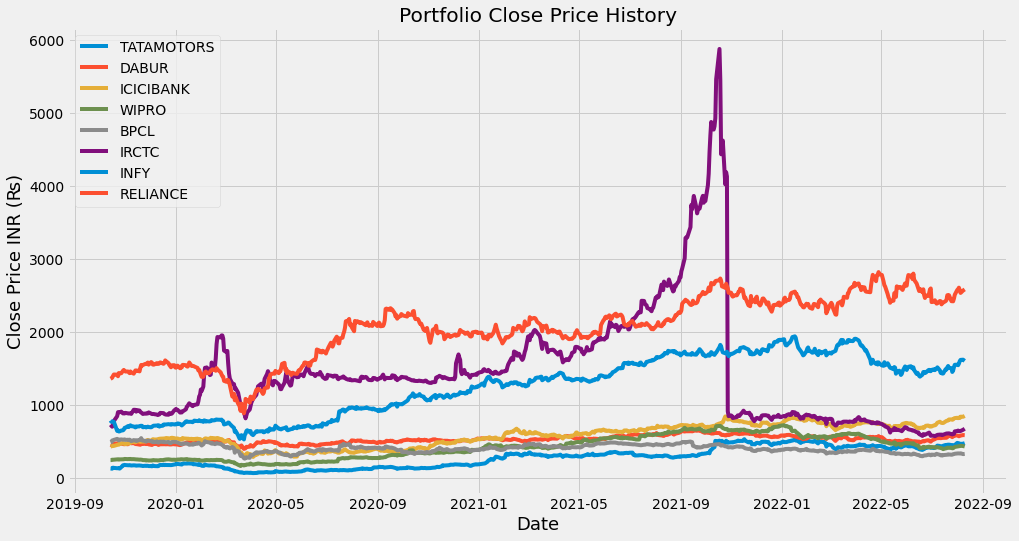

In [5]:
# Analysis
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
    ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)

            TATAMOTORS     DABUR  ICICIBANK     WIPRO      BPCL     IRCTC  \
TATAMOTORS    1.000000  0.698943   0.949733  0.857916 -0.128232 -0.027679   
DABUR         0.698943  1.000000   0.748591  0.887292  0.128240  0.470730   
ICICIBANK     0.949733  0.748591   1.000000  0.851196  0.020866  0.062680   
WIPRO         0.857916  0.887292   0.851196  1.000000  0.042148  0.317289   
BPCL         -0.128232  0.128240   0.020866  0.042148  1.000000  0.389415   
IRCTC        -0.027679  0.470730   0.062680  0.317289  0.389415  1.000000   
INFY          0.899982  0.855024   0.874309  0.964908 -0.121196  0.189053   
RELIANCE      0.802962  0.693721   0.731603  0.788885 -0.230431  0.100840   

                INFY  RELIANCE  
TATAMOTORS  0.899982  0.802962  
DABUR       0.855024  0.693721  
ICICIBANK   0.874309  0.731603  
WIPRO       0.964908  0.788885  
BPCL       -0.121196 -0.230431  
IRCTC       0.189053  0.100840  
INFY        1.000000  0.864357  
RELIANCE    0.864357  1.000000  
Correlati

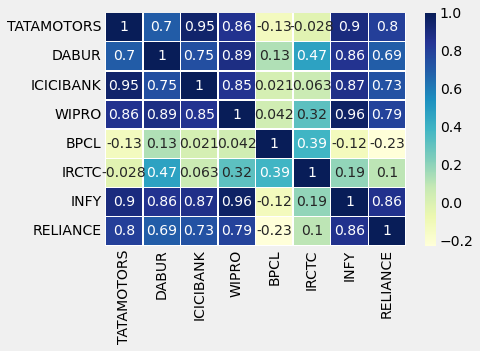

In [6]:
# Correlation Matrix

correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

fig1 = plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)

            TATAMOTORS     DABUR  ICICIBANK     WIPRO      BPCL     IRCTC  \
Date                                                                        
2019-10-15   -0.007039 -0.010989   0.006995  0.000822  0.008952 -0.020062   
2019-10-16   -0.008665  0.013556   0.007989  0.021547  0.045074 -0.017528   
2019-10-17    0.108462  0.013813   0.012176 -0.004219  0.001756  0.033754   
2019-10-18   -0.018996  0.008867  -0.006355  0.004236  0.013637  0.075728   
2019-10-22   -0.037267  0.013076   0.030493  0.018682  0.026523  0.084130   
...                ...       ...        ...       ...       ...       ...   
2022-08-03   -0.017743 -0.014613   0.008621  0.006401 -0.003730 -0.008951   
2022-08-04    0.002351  0.007196  -0.005516  0.007286  0.000150 -0.004905   
2022-08-05   -0.007784  0.009148   0.021884  0.010333  0.007336  0.005243   
2022-08-08    0.006448  0.012691  -0.001491 -0.009432 -0.031956  0.025142   
2022-08-10    0.015590 -0.002643   0.014099 -0.013078  0.008138  0.022248   

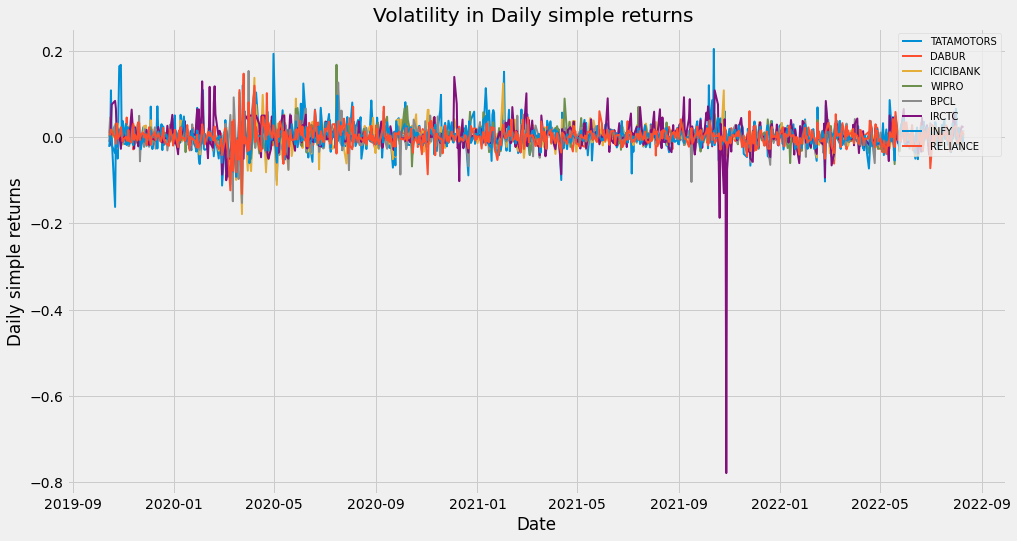

In [7]:
# Risk & Return

daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)
print(daily_simple_return)

print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))

for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

In [8]:
#Average Daily returns
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)

Average Daily returns(%) of stocks in your portfolio
TATAMOTORS    0.243226
DABUR         0.048142
ICICIBANK     0.127550
WIPRO         0.101600
BPCL         -0.026013
IRCTC         0.136573
INFY          0.122078
RELIANCE      0.115950
dtype: float64


Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.
TATAMOTORS    53.909876
DABUR         25.066515
ICICIBANK     39.086710
WIPRO         32.550329
BPCL          38.573805
IRCTC         66.292717
INFY          32.303906
RELIANCE      35.295421
dtype: float64


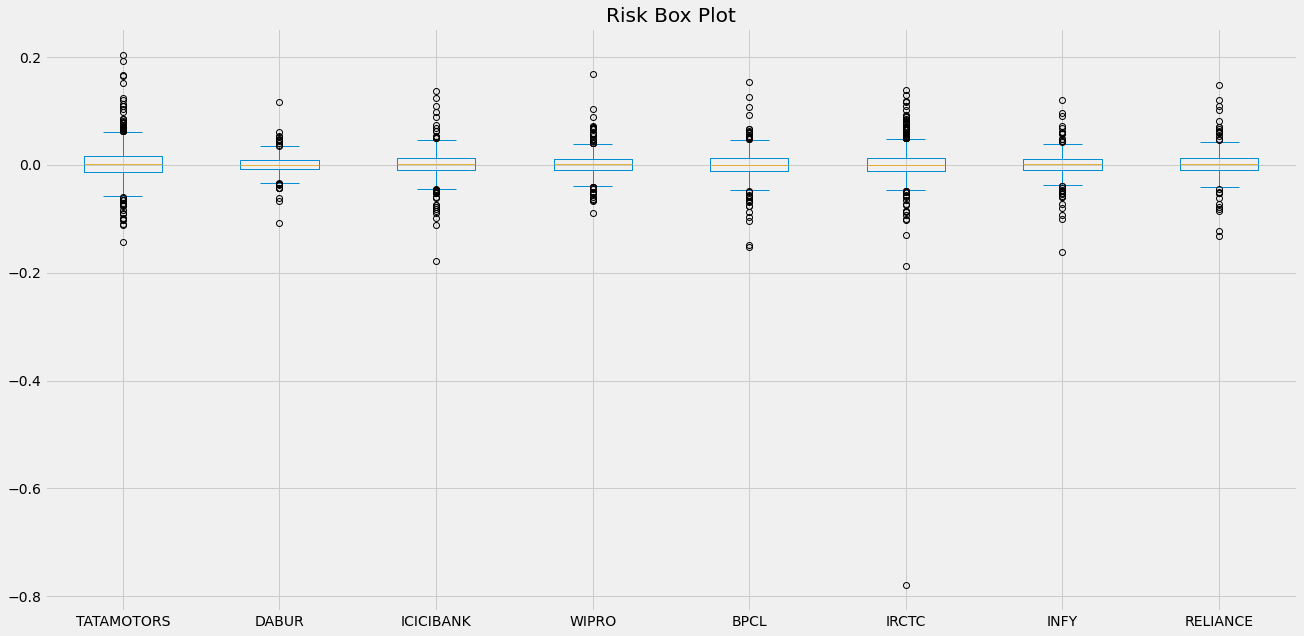

In [9]:
# Risk Box-Plot
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")

print('Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.')
print(daily_simple_return.std() * np.sqrt(252) * 100)

In [10]:
# Return Per Unit Of Risk:
print(Avg_daily / (daily_simple_return.std() * np.sqrt(252)) *100)

TATAMOTORS    0.451172
DABUR         0.192059
ICICIBANK     0.326326
WIPRO         0.312132
BPCL         -0.067438
IRCTC         0.206015
INFY          0.377905
RELIANCE      0.328512
dtype: float64


In [11]:
# Cumulative Returns:

daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
print(daily_cummulative_simple_return)

            TATAMOTORS     DABUR  ICICIBANK     WIPRO      BPCL     IRCTC  \
Date                                                                        
2019-10-15    0.992961  0.989011   1.006995  1.000822  1.008952  0.979938   
2019-10-16    0.984357  1.002418   1.015040  1.022387  1.054429  0.962762   
2019-10-17    1.091122  1.016264   1.027399  1.018074  1.056282  0.995259   
2019-10-18    1.070395  1.025275   1.020870  1.022387  1.070686  1.070629   
2019-10-22    1.030504  1.038681   1.052000  1.041487  1.099084  1.160701   
...                ...       ...        ...       ...       ...       ...   
2022-08-03    3.658975  1.252308   1.923283  1.775929  0.687108  0.882377   
2022-08-04    3.667579  1.261319   1.912673  1.788868  0.687211  0.878049   
2022-08-05    3.639030  1.272857   1.954530  1.807353  0.692252  0.882652   
2022-08-08    3.662495  1.289011   1.951615  1.790306  0.670131  0.904844   
2022-08-10    3.719593  1.285604   1.979130  1.766893  0.675584  0.924974   

Cummulative Returns


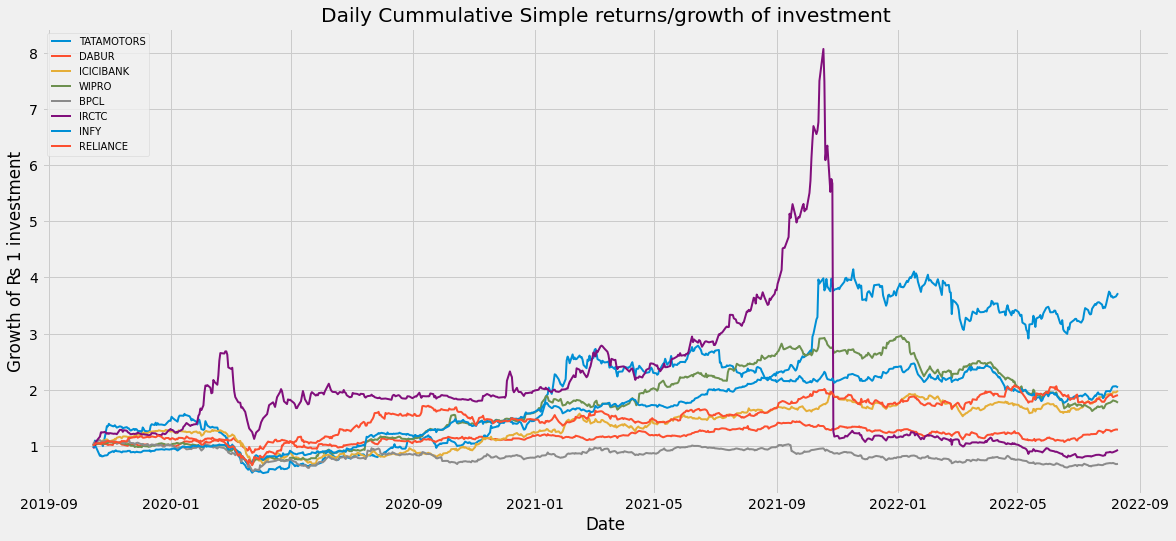

In [12]:
#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 investment')
plt.show(fig)